<a href="https://colab.research.google.com/github/Moigi/DCA---Data-Cleaning/blob/main/ProjectProposal_DataCP_109_group18(4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# COGS 109 - Final Project Proposal and Data Checkpoint

In [81]:
#from google.colab import drive
#drive.mount('/content/drive')

# Names

- CEWEN CHI

# Research Question

"What is the relationship between the electric range of vehicles and their geographical distribution in different counties? Moreover, how does this relationship vary across different electric vehicle types and utility companies?"



# Hypothesis


Research Hypothesis (H1): There is no significant relationship between the electric range of electric vehicles and their geographical distribution across different counties. This relationship varies across different types of electric vehicles and utility companies.

Null Hypothesis (H0): There is a significant relationship between the electric range of electric vehicles and their geographical distribution across different counties. This relationship does not vary across different types of electric vehicles and utility companies.


# Background and Prior Work

Electric vehicles (EVs) have been gaining popularity due to their potential to reduce greenhouse gas emissions and dependence on fossil fuels. They come in different types, including Battery Electric Vehicles (BEVs), Plug-In Hybrid Electric Vehicles (PHEVs), and Hybrid Electric Vehicles (HEVs). Each type has a different electric range, referring to the distance that an EV can travel using the power stored in its battery1.

Numerous studies have been conducted to understand the factors influencing the adoption and distribution of EVs. A study by Egbue and Long (2012) examined factors influencing the adoption of EVs in the U.S. They found that factors such as vehicle characteristics (including electric range), charging infrastructure, and government incentives play significant roles in EV adoption.

On a more granular level, geographic information systems (GIS) have been used to analyze the spatial distribution of EVs and their correlation with socio-economic variables. For example, a study by Helmus and van den Hoed (2015) investigated the spatial distribution of EVs in the Netherlands and found a significant correlation with household income and the number of charging points.

In our study, we aim to extend this body of work by examining the relationship between the electric range of EVs and their geographical distribution across different counties. Moreover, we will explore how this relationship varies across different electric vehicle types and utility companies.

Footnotes
U.S. Environmental Protection Agency. (2021). Types of Electric Vehicles. Retrieved from https://www.epa.gov/greenvehicles/types-electric-vehicles ↩

Egbue, O., & Long, S. (2012). Barriers to widespread adoption of electric vehicles: An analysis of consumer attitudes and perceptions. Energy Policy, 48, 717-729. ↩

Helmus, J. R., & van den Hoed, R. (2015). Socio-economic factors in the adoption of electric vehicles in the Netherlands. In European Battery, Hybrid and Fuel Cell Electric Vehicle Congress. Brussels, Belgium. ↩


## Data
1. Ideal Dataset Description

The ideal dataset to answer our research question would include the following variables:

**Electric Range**: The distance an EV can travel using the power stored in its battery.

**Geographic Location**: The county where each EV is located.

**Vehicle Type**: The type of each EV (e.g., Battery Electric Vehicle, Plug-In Hybrid Electric Vehicle, etc.).

**Utility Company**: The company providing electric service to the EV.

The dataset would ideally include thousands of observations to ensure a robust analysis.
It would be collected through surveys or administrative records from vehicle registration
departments or utility companies. The data could be stored in a structured format like a CSV or Excel file,
or in a database if the size is large.

2 .Real Dataset

We have identified a real-world dataset, "Electric_Vehicle_Population_Data.csv", that includes all these variables and more. It appears to be collected from vehicle registration records and includes a large number of observations, making it a good fit for our study. This dataset was extracted from: https://catalog.data.gov/dataset/electric-vehicle-population-data

However, there are potential limitations with this dataset. For instance, the electric range could be affected by factors not included in the dataset, such as the age or condition of the vehicle. Additionally, the dataset appears to be specific to one state (Washington),
so the findings might not be generalizable to other areas.

**Loading all the necessary packages for analysis in this study**.

In [3]:
#!pip3 install researchpy

In [88]:
import matplotlib.pyplot as plt
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score
import re
import geopandas as gpd
import plotly.express as px
from shapely.geometry import Point
import seaborn as sns
from sklearn import preprocessing
import researchpy as rp
import scipy.stats as stats
from sympy import *
import warnings
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)  # Display all columns

**Loading the real data**

In [7]:
df = pd.read_csv("/content/drive/MyDrive/Data/Electric_Vehicle_Population_Data.csv")

# Exploratory Data Analysis (EDA)

In this study, we plot run summaary statistics for quantitative (Electric Range) variable and different visualizations establish the relationship between Electric Range and County (geographical distribution), and also see how this relationship varies when we take Electric Vehicle Type and Electric Utility into account.

Displaying the first 3 observations on the original data

In [30]:
#df.head(3)

3. **Data Wrangling & Cleaning**

In this section, we start by selecting the identified variables (**Ideal dataset description above**). These variables are believed to answer our research question.

 - Selecting the required variables

In [71]:
vars = df[['County', 'Electric Vehicle Type',
           'Electric Range', 'Electric Utility']]

**Below is the structure of our selected data**

In [10]:
vars.info() # Checking on the datatypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138779 entries, 0 to 138778
Data columns (total 4 columns):
 #   Column                 Non-Null Count   Dtype 
---  ------                 --------------   ----- 
 0   County                 138776 non-null  object
 1   Electric Vehicle Type  138779 non-null  object
 2   Electric Range         138779 non-null  int64 
 3   Electric Utility       138776 non-null  object
dtypes: int64(1), object(3)
memory usage: 4.2+ MB


It can be observed that 'county', 'Electric Range', 'Electricity Utility' are categorical variables while 'Electric Range' is a numeric variable.

We can also observe that there are 138, 779 observations and 4 features/ variables.

**Renaming the variable Electric Utility to Company Utility**

In [72]:
vars = vars.rename(columns = {'Electric Utility':'Company Utility'})  # Using rename()

**Checking if there is any missing values in the dataset**

In [73]:
vars.isnull().sum()

County                   3
Electric Vehicle Type    0
Electric Range           0
Company Utility          3
dtype: int64

We can observe that 'county' and 'Electric Utility' have missing (null) values.

**Removing/ dropping the null values**

In [74]:
vars_Clean = vars.dropna()

**Checking if indeed the null values were dropped**.

In [75]:
vars_Clean.isnull().sum()

County                   0
Electric Vehicle Type    0
Electric Range           0
Company Utility          0
dtype: int64

**Removing or dropping observations put as 0s (zeros) in Electric Range variables**.

In [76]:
data = vars_Clean[vars_Clean['Electric Range']>0]

**Removing/ Dropping duplicate values**

In [77]:
Data = data.drop_duplicates(subset=['County'])

- Central tendency and variability for Electric Range

In [78]:
data['Electric Range'].describe()

count    78614.000000
mean       127.636375
std         99.058466
min          6.000000
25%         32.000000
50%         84.000000
75%        215.000000
max        337.000000
Name: Electric Range, dtype: float64

The summary statistics table above, shows that the average distance an EV can travel using the power stored in its battery (Electric Range) is 72.30 miles while its variability stands at approximately 97.77 miles. It can also be observed that the minimum Electric Range value is 6 while the maximum is 337 miles.

**Data Visualization**
- Checking the distribution of the distance an EV can travel using the power stored in its battery (Electric Range).

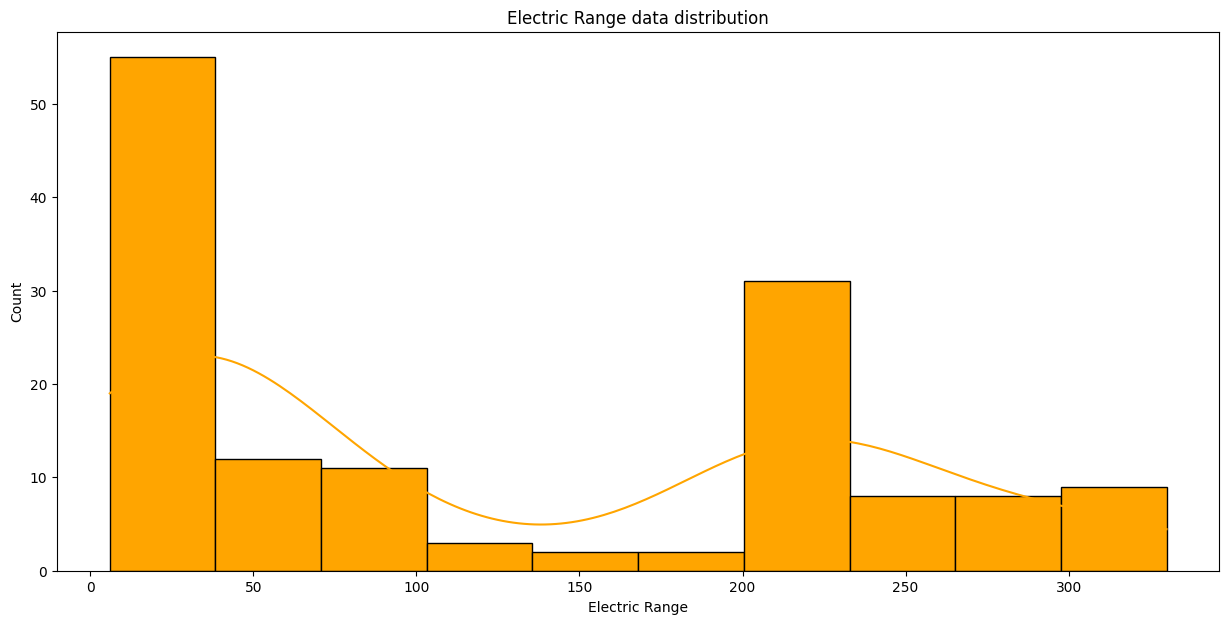

In [18]:
# Plot histogram
fig, ax = plt.subplots(figsize=(15, 7))
sns.histplot(Data, x = 'Electric Range',
             kde = True,color = 'orange',alpha = 1
            ,bins = 10)
#ax.grid(which="both")
#ax.minorticks_on()
ax.tick_params(which="minor")
plt.title('Electric Range data distribution')
plt.show()

From the graph above we can observe that the distribution of the the distance an EV can travel using the power stored in its battery is positively skewed.

- **Pie chart showing the market proportion for thetwo types of Electric Vehicle**

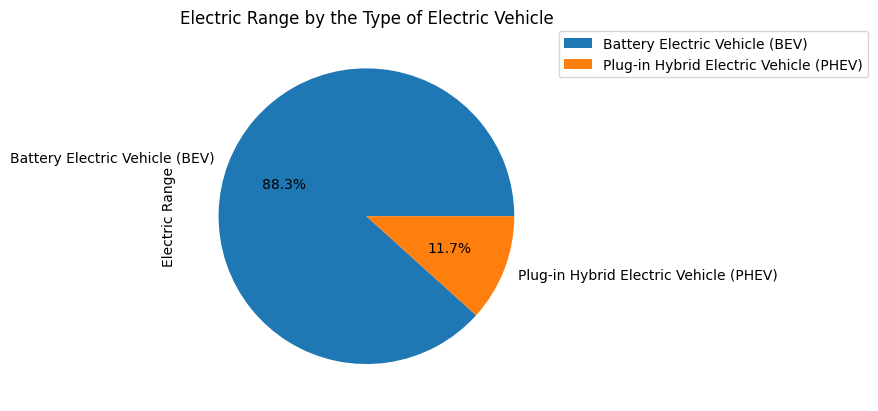

In [20]:
Data.groupby(['Electric Vehicle Type']).sum().plot(
    kind='pie', y='Electric Range', autopct='%1.1f%%')
plt.title('Electric Range by the Type of Electric Vehicle')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)
plt.show()

From the graph above, it's evidenced that battery electric vehicles still dominates the markert however there is a significant (11.7%) penetration of plug-in Hybrid electric vehicles in the market.

**Top 10 counties in terms of average electric range**

In [21]:
ER_County = Data.groupby('County')['Electric Range'].mean().sort_values(ascending=False)

First_10_Counties = ER_County.head(10)

First_10_Counties

County
Grant         330.0
El Paso       330.0
St. Louis     322.0
St. Clair     322.0
Laramie       322.0
Pulaski       322.0
Rockingham    308.0
Arlington     308.0
Norfolk       308.0
King          293.0
Name: Electric Range, dtype: float64

- **Bar graph of the top 10 counties**

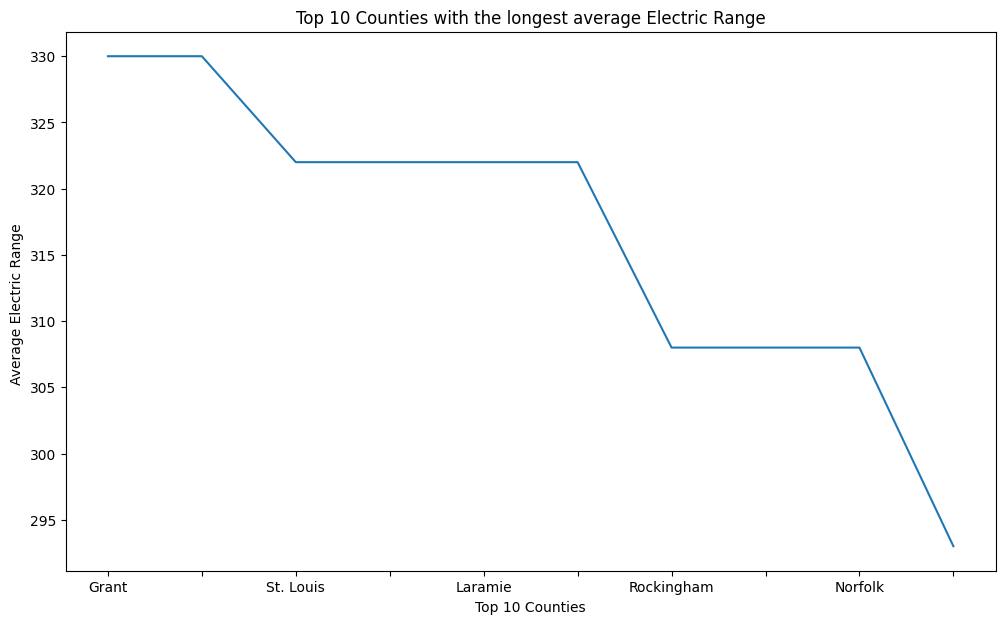

In [22]:
fig, ax = plt.subplots(figsize=(12, 7))

First_10_Counties.plot(kind='line')
plt.title('Top 10 Counties with the longest average Electric Range')

plt.xlabel('Top 10 Counties')
plt.ylabel('Average Electric Range ')
plt.xticks(range(0,10))
plt.show()


From the line graph above, we can observe that grant county has the longest electric range on average while the King county closes the list of the top 10 counties. This shows that shows that electric range depends on the geographical location.

- Bar graph illustrating top 10 company utility in respect to Electric Range

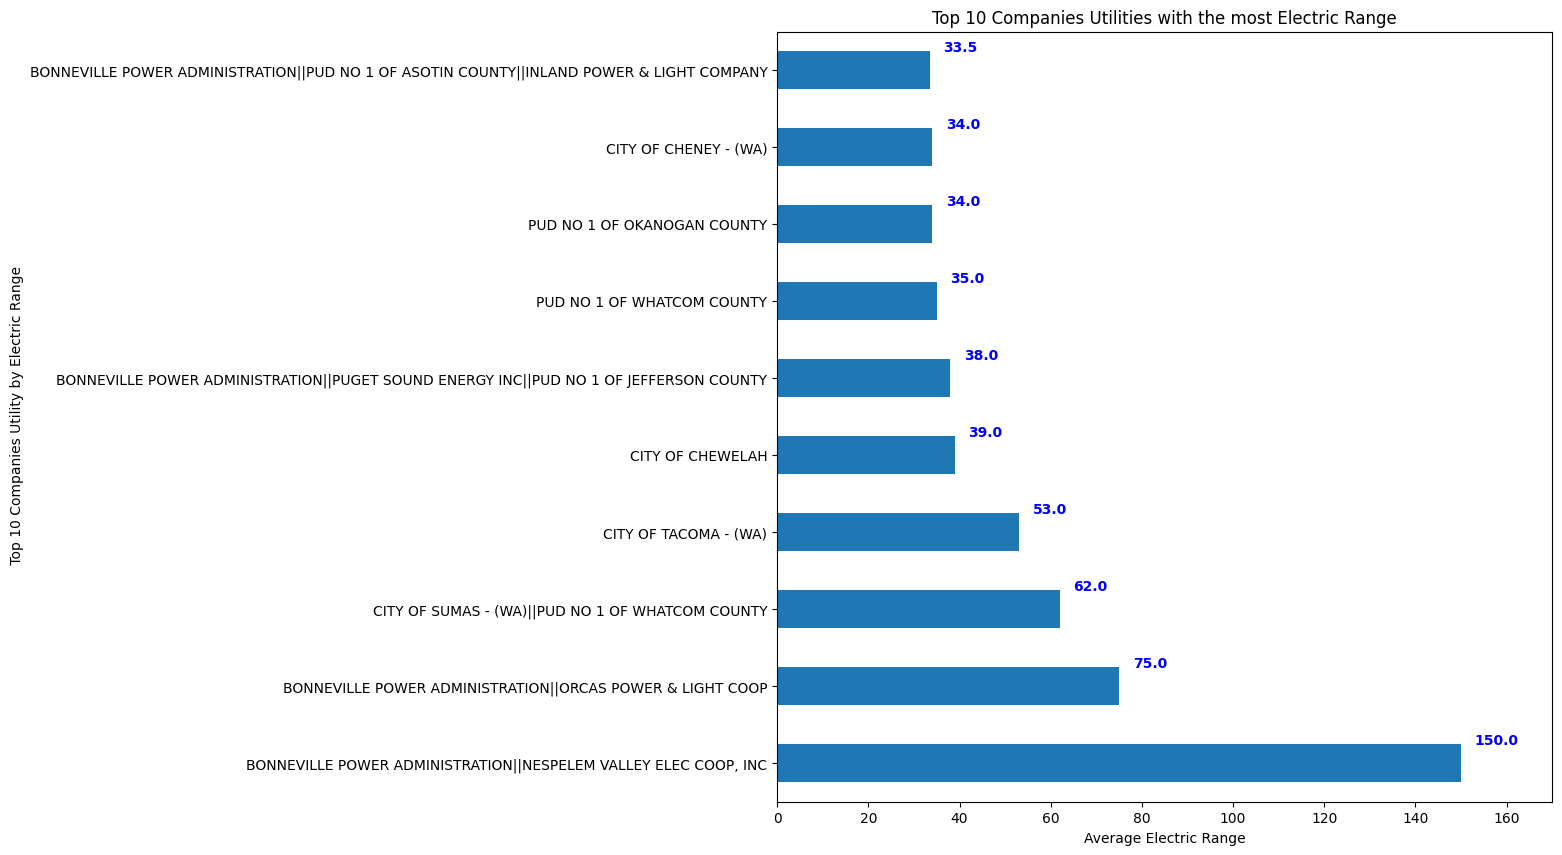

In [23]:
ER_CompanyUtility = vars_Clean.groupby(
    'Company Utility')['Electric Range'].median().sort_values(ascending=False)
First_10_CompanyUtility = ER_CompanyUtility.head(10)

fig, ax = plt.subplots(figsize=(10, 10))
First_10_CompanyUtility.plot(kind='barh')
plt.title('Top 10 Companies Utilities with the most Electric Range')
#ax.grid(which="both")
#ax.minorticks_on()
ax.tick_params(which="minor")
plt.xlabel('Average Electric Range')
plt.ylabel(' Top 10 Companies Utility by Electric Range')
plt.xlim(0,170)
for i, v in enumerate(First_10_CompanyUtility):
    ax.text(v + 3, i + .25, str(v),color = 'blue', fontweight = 'bold')
plt.show()

The bar graph above, illustrate the distribution of average of electric range by Company Utility. It can be observed that BONNEVILLE POWER ADMINISTRATION company ulity has the longest electric range on average.

## Hypothesis Testing

In this project the appropriate test which will answer our research question is **Chi-square test of independence**. This is because it help us to establish where a relationship exist or not between categorical variables.

- **Creating the variable** (Electric_Range)

In [83]:
Data['Electric_Range'] = np.where(Data['Electric Range'] <130, 'Low','High')

**Testing the relationship between the distance an EV can travel using the power stored in its battery (Electric Range) and electric vehicles' geographical Location (county)**.

In [70]:
crosstab, test_results, expected = rp.crosstab(Data["County"], Data["Electric_Range"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
test_results

,Chi-square test,results
0,Pearson Chi-square ( 140.0) =,141.0000
1,p-value =,0.4604
2,Cramer's V =,1.0000


The results obtained above shows that there p-value is sufficiently large and hence the null hypothesis is rejected. This means there is a significant relationship between the electric range of electric vehicles and their geographical distribution across different counties.

## Data Preparation for model development.

- Creating a new variable'Electric_Range_Modelling' from Electric Range variable into dummy i.e 0 if electric range is less the mean and elsewhere 1 if greater than the mean

In [39]:
Data['Electric_Range_Modelling'] = np.where(Data['Electric Range'] <130, 0,1)

- Converting county, electric vehicle type and company utlity variables into numerical values

In [58]:
label_encoder = preprocessing.LabelEncoder()
# Creating numerical dummies in categorical variables.
Data['County']= label_encoder.fit_transform(Data['County'])
Data['Electric Vehicle Type']= label_encoder.fit_transform(Data['Electric Vehicle Type'])
Data['Company Utility']= label_encoder.fit_transform(Data['Company Utility'])

**Data description**

- Electric_Range_Modelling: the distance an EV can travel using the power stored in its battery (high or low).

- County: geographical location where each EV is located.

- Vehicle Type: the type of each EV (e.g., Battery Electric Vehicle, Plug-In Hybrid Electric Vehicle).

- Utility Company: the company providing electric service to the EV.

**Create Training and Test Samples**

In [53]:
#define the predictor variables and the response variable
X = Data[['County', 'Electric Vehicle Type', 'Company Utility']]
y = Data['Electric_Range_Modelling']

#split the dataset into training (70%) and testing (30%) sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

**Creating Logistic Regression Model**

In [54]:
#instantiate the model
log_regression = LogisticRegression()

#fit the model using the training data
log_regression.fit(X_train,y_train)

**Model Perfomance**

Once we have fitted the regression model, we can then analyze how well the model performs on the test dataset.

In [90]:
#use model to make predictions on test data
y_pred = log_regression.predict(X_test)
print(classification_report(y_test, y_pred, zero_division=1))

              precision    recall  f1-score   support

           0       1.00      0.81      0.89        21
           1       0.85      1.00      0.92        22

    accuracy                           0.91        43
   macro avg       0.92      0.90      0.91        43
weighted avg       0.92      0.91      0.91        43



The accuracy values obtained tells us that the model made the correct prediction for whether or not electric range would be high is 91%.

# Discussion & Conclusion

A Chi-Square Test of Independence was performed to assess the relationship between the distance an EV can travel using the power stored in its battery (Electric Range) and their geographical location in terms of counties. The results obtained from the analysis shown that there was a significant relationship between the two variables, x^2(140,N=136181) = 141, p = 0.4604.

These results means that the null hypothesis is rejected and alternatively accepted. This means that there is a significant relationship between the electric range of electric vehicles and their geographical distribution across different counties. i.e the distance an EV can travel using the power stored in its battery (Electric Range) dependents on the electric vehicle's geographical location.

Also, from the graphs of **Electric range** by **Electric vehicle type** and **Electric range** by **Company Utility**, it can be seen that the relationship witness varys across different electric vehicle types and utility companies.

The logistic regression model developed has a performance level (accuracy) of 90.7%. This implies that given the geographical location, company utility and electric vehicle type, one is able to predict whether the electric range of a particular vehicle is high or low with 90.7% accuracy.

